**Hello Kamil!**
    
Here is Alex again! I have reviewed some of your previous projects, and I will review your current one! I have added all my comments to new cells with different coloring. If the project contains one or more red comments, it will be rejected for fixing. Please, do not move or delete my comments - it helps us move faster.

<div class="alert alert-success">
<b>Reviewer's comment v.1</b> 
    
I am using green color for my comment if everything is done successfully.
</div>
<div class="alert alert-warning">
<b>Reviewer's comment v.1</b> 
    
I will use yellow color for my comment if I can give you a recommendation or think that something can be improved. This is an optional recommendation, but it will be perfect if you work with them.
</div>
<div class="alert alert-danger">
<b>Reviewer's comment v.1</b> 
    
I am using red color for my comment if the block requires some extra work or corrections. The project couldn’t be accepted with red comments.
</div>
  
To make a dialog, let’s use this style for your remarks:
<div class="alert alert-info"> 
<b>Student's comment</b> 
    
Just like this. To make a similar block - double click on the block , copy and edit it in places you are changing.
</div>

Now, let’s go to data analysis!

---

<div class="alert alert-danger">
<b>General feedback v.1</b>
    
Kamil, thank you for sending your project. 
    
You have made a lot of correct steps! However, I would suggest that there are minor issues. You can find them in the red boxes. I believe you can easily fix it! Also, please pay attention to the yellow blocks.
    
<br>
Keep up the good work, and come back soon!   
<br> Alex    
</div>


---

<div class="alert alert-success">
<b>General feedback v.2</b>
    
Kamil, thank you for sending the revised version of the project. 
    
Your corrections look great, and now your project is a true "A". Congratulations! I'm glad to say that your project has been accepted. You are doing well in data analysis, keep up the good work!
    
<br>
Bests, 
<br> Alex    
</div>


# Taxi Companies Analytics

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1: Open data and general information](#OpenData&GeneralInfo)
3.   [* Step 1: Conclusion](#GeneranlInfoConclusion)
4. [Step 2: Prepare the Data](#PrepareData)
5. [* To Do List](#Step2ToDoList)
6.  [* Step 2: Conclusion](#Step2Conclusion)
7. [Step 3: Testing hypotheses in Step 5](#AnalyzeData)
8.  [* Step 3: Conclusion](#Step3Conclusion)
9. [Step 4: Test the Hypotheses](#Step4Hypotheses)
10. [**Null Hypotheses](#NullHypotheses1)
11. [**Null Hypotheses Conclusion:](#NullHypotheses1Conclusion)
12. [Step 5: Write an overall conclusion](#OverallConclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  |   |
|  **Main question of project**  |  |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-analyst/courses/44b40536-c875-4106-afac-99788bbc5fb2/sprints/4234/topics/300f79e3-731f-4617-815d-4cdcde909a3f/lessons/6a924c99-1303-4676-8c52-020001505c2c/)    |
| **Datasets**             | [/datasets/project_sql_result_01.csv](https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv)  |
|                          | [/datasets/project_sql_result_04.csv](https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv) |
|                          | [/datasets/project_sql_result_07.csv](https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv)|  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ Good start with the brief introduction and the table of contents!

</div>

<div class="alert alert-warning">
<b>Reviewer's comment v.1</b> 
    
💡 As a recommendation: we could add the description of the project, main goal, some additional information. Your future colleagues will appreciate it!
</div>


### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [1]:
# import all packages
import pandas as pd
import numpy as np
import random
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [6]:
print(pd.__version__)

0.25.1


<div class="alert alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ It is good that the first cell contains all imports used in this project are collected here without any code. It is consistent with <a href="https://www.python.org/dev/peps/pep-0008/#imports">PEP 8 - Style Guide for Python Code</a> 
</div>

In [2]:
# connect all datasets:
df_company = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv')
df_location = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv')
df_loop = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv')

In [3]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [4]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include='object'))
    print('-'*110)
    
    print('Columns with nulls:')
    get_percent_of_na(df, 2)
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [5]:
def sort_desc(df, col):
    return df.sort_values(by=col, ascending=False)

In [6]:
df_company = sort_desc(df_company, 'trips_amount')
df_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [7]:
# let's use get_info function for check information for all datasets:
get_info(df_company)
get_info(df_location)
get_info(df_loop)

Head:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,company_name
count,64
unique,64
top,Star North Management LLC
freq,1


--------------------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
--------------------------------------------------------------------------------------------------------------
Shape:
(64, 2)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////
Head:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


,dropoff_location_name
count,94
unique,94
top,Brighton Park
freq,1


--------------------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
--------------------------------------------------------------------------------------------------------------
Shape:
(94, 2)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////
Head:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


,start_ts,weather_conditions
count,1068,1068
unique,81,2
top,2017-11-11 10:00:00,Good
freq,48,888


--------------------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
--------------------------------------------------------------------------------------------------------------
Shape:
(1068, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 197 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


#### Step1: Conclusion <a name="GeneranlInfoConclusion"></a>

Based on the above information: 
* We can say that there are no missing values in the datasets. Very clean data.

<div class="alert alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ Well done. The data were opened, and we got the main information about it. You are right - the data are very good. It is good that you have used the function to get the main information.
    
</div>

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.1</b> 
    
💡 As a recommendation:  we could use the `.astype('int16')` method for the `['average_trips']` and similar data. It would save resources if we worked with big data. This might help: https://vincentteyssier.medium.com/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e 
</div>

### Step 2. Exploratory data analysis for Step 4. <a name="PrepareData"></a>

#### To-Do List: <a name="Step2ToDoList"></a>

- [X] study the data they contain
- [X] make sure the data types are correct
- [X] identify the top 10 neighborhoods in terms of drop-offs
- [X] make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- [X] draw conclusions based on each graph and explain the results

First check data types.

In [8]:
# convert start_ts column to datetime format from dataframe df_loop
df_loop['start_ts'] = pd.to_datetime(df_loop['start_ts'])

In [9]:
# convert average_tips column from float64 to float16
df_location['average_trips'] = df_location['average_trips'].astype('float16')
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float16
dtypes: float16(1), object(1)
memory usage: 1.0+ KB


In [10]:
df_loop['weather_conditions'].duplicated().sum()

1066

In [11]:
df_loop['duration_seconds'].duplicated().sum()

573

In [12]:
df_loop = df_loop.drop_duplicates()

In [13]:
# check again by function, this dataframe - df_loop about duplications.  
get_info(df_loop)

Head:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,duration_seconds
count,871.000000
mean,2096.308840
std,782.274717
min,0.000000
25%,1440.000000
50%,2015.000000
75%,2584.000000
max,7440.000000


,weather_conditions
count,871
unique,2
top,Good
freq,723


--------------------------------------------------------------------------------------------------------------
Columns with nulls:

There are no columns with NA.
--------------------------------------------------------------------------------------------------------------
Shape:
(871, 3)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


<div class="alert alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ Correct!
    
</div>

<AxesSubplot:xlabel='average_trips'>

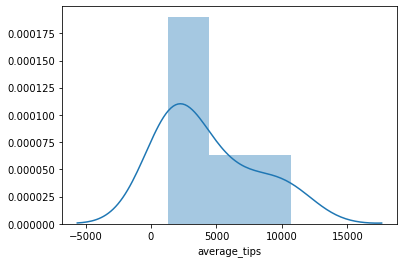

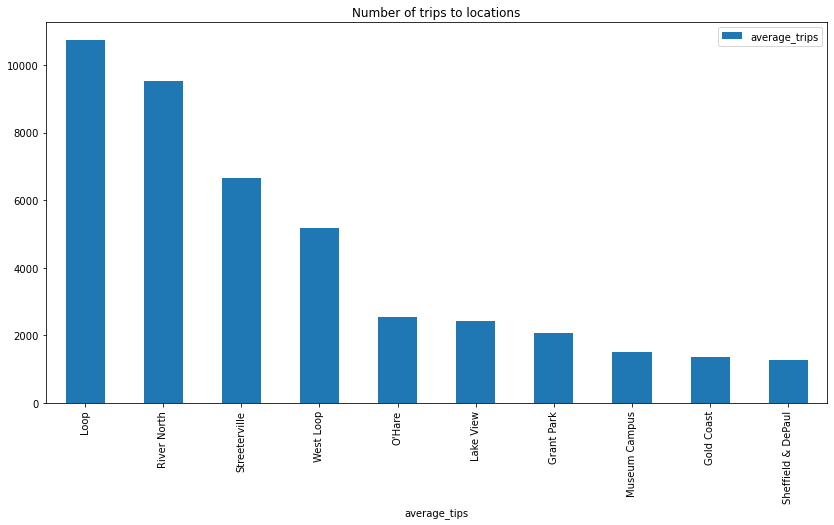

In [14]:
# check and we will determine the 10 top in terms of drop-offs.
df_location_sort = sort_desc(df_location, 'average_trips')
display(sns.distplot(df_location_sort.head(10)['average_trips']))
plt.xlabel('average_tips')
df_location.head(10).plot.bar(x='dropoff_location_name', figsize=(14,7))
plt.title('Number of trips to locations')
plt.xlabel('average_tips')
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1</b>
    
Based on the code, I would suggest the issue here: before plotting the graph we have to make sure that the data have been sorted by `average_trips` values. Please check that. I think that it is a good place to use your `sort_desc()` function.
    
Also, please check if each graph within the project contain the title and axis-labels. 
</div>


 - [X] Done.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Correct! Thanks!

</div>

Description of graphs for average_trips:
> * According to the graph, activity places: Loop/River North, Streetville/West Loop.

<div class="alert alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ Well done! We detected the top drop-offs localities.
</div>

<AxesSubplot:xlabel='trips_amount'>

<AxesSubplot:title={'center':'Avg Trips per Company'}, xlabel='company_name'>

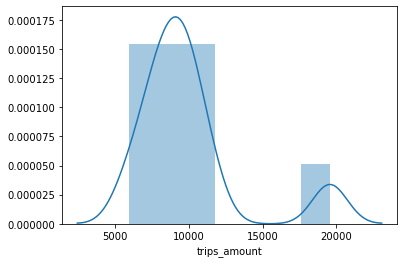

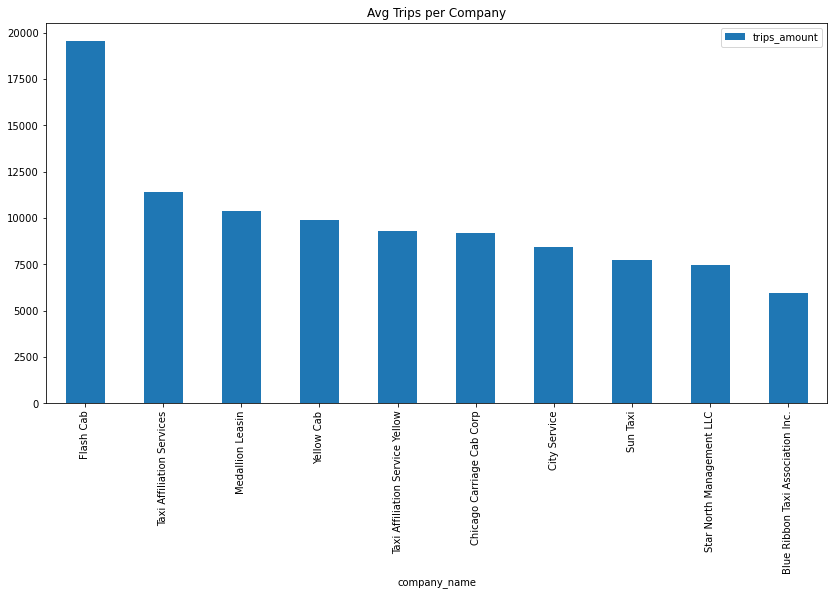

In [15]:
display(sns.distplot(df_company.head(10)['trips_amount']))
df_company.head(10).plot(kind='bar', x='company_name', figsize=(14,7), title='Avg Trips per Company')

Description of graphs for company_name:
> * Taxi company Flash Cab significantly ahead of all other companies.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ Well done! We have detected the most popular taxi companies. 
</div>

### Step 2: Conclusion <a name="Step2Conclusion"></a>

> * Loop/River North, Streetville/West Loop - the most popular areas for taxi rides.
> * A Flash Cab taxi company is ranked first in terms of the number of transports among other companies.

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.1</b> 
    
💡 As a recommendation: It will be better if we make some additional analysis why these places are so popular. For example, I have not been to Chicago, but as I know, the first four top neighborhoods (Loop, River North, Streeterville, West Loop) are located close to each other and are the most popular places in Chicago. People are more likely to transfer between these places. It explains the high amount of average trips for them.  http://www.thechicago77.com/chicago-neighborhoods/
</div>

<div class="alert alert-info"> 
<b>To be honest, I somehow did not go deep into the description of this project. It seemed to me that it would be easy to do it, without much effort. But. I decided to fix this gap.</b> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Do not worry it is Ok.

</div>

### Step 3. Testing hypotheses in Step 5 <a name="AnalyzeData"></a>

> - [x] The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.".

**Explain:**

> - [X] How you formulated the null and alternative hypotheses.
- [X] What criterion you used to test the hypotheses and why.

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1</b> 
    
I would suggest that at this step, we should also study the data before the test:
- check the data types for their correction;
- check the data for duplicates;
- revise the data on any mistakes.

At the end of this step, we should present brief conclusions. You have opened the data in the start of the project but
       
Please add this part.
</div>

 - [X] Done.

#### Null Hypotheses: <a name="NullHypotheses1"></a>

* The first Null Hypotheses: 

> Average trip duration in bad weather = Average trip duration in good weather

* Alternative Hypotheses:

> Average trip duration in bad weather <> Average trip duration in good weather

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1</b> 
    
Please be careful with formulation of hypotheses. During the t-test we also have two hypotheses:
1. `H0` means that the avarage values for two samples **are equal**
2. `H1` means that  the avarage values for two samples **are not equal**
           
Please fix this part.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Correct!

</div>

In [16]:
display(df_loop.head())
df_loop['start_ts'].dt.weekday.unique()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


array([5], dtype=int64)

In [17]:
df_loop.groupby('weather_conditions').duration_seconds.describe()

,count,mean,std,min,25%,50%,75%,max
weather_conditions,,,,,,,,
Bad,148.0,2409.229730,751.544705,480.0,1746.0,2463.5,2940.0,4980.0
Good,723.0,2032.253112,773.444860,0.0,1435.5,1883.0,2491.5,7440.0


In [18]:
df_good = df_loop[df_loop['weather_conditions'] == 'Good']
df_bad  = df_loop[df_loop['weather_conditions'] == 'Bad']

In [19]:
df_good.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [20]:
print('For good weather, duration time mean value:', df_good['duration_seconds'].mean())
print('For bad weather, duration time mean value:', df_bad['duration_seconds'].mean())

For good weather, duration time mean value: 2032.253112033195
For bad weather, duration time mean value: 2409.2297297297296


In [21]:
# define function for check hypotheses:
def test_hypotheses(pattern_1, pattern_2):
    alpha   = .05
    results = st.ttest_ind(pattern_1, pattern_2, equal_var=False)

    print('pvalue:', results.pvalue)
    print('alpha:', alpha)
    if results.pvalue < alpha:
        print('Decision: We reject the null hypotheses')
    else:
        print('Decision: We cannot reject the null hypotheses')

In [22]:
# for check hypotheses upload patterns for Good and Bad weather:
test_hypotheses(df_good['duration_seconds'], df_bad['duration_seconds'])

pvalue: 9.126383933880083e-08
alpha: 0.05
Decision: We reject the null hypotheses


#### Null Hypotheses Conclusion: <a name="NullHypotheses1Conclusion"></a>

> * p_value< 0.05, reject null hypothesis -- there is a significant difference in trip duration in good vs bad weather

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1</b> 
    
✔ Ok! The code is right. You have provided the test and got very lowe p-value. Good.
</div>

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1</b> 
    
Please check the hypotheses. I think that we should make different conclusions.
</div>

 - [X] Done.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
✔ Now it is correct! Thank you!

</div>

In [23]:
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


### Step 5. Write an overall conclusion <a name="OverallConclusion"></a>

> * Loop/River North, Streetville/West Loop - the most popular areas for taxi rides.
> * A Flash Cab taxi company is ranked first in terms of the number of transports among other companies.
> * There is a significant difference in trip duration in good vs bad weather.

* The first thing I decided to start with was to look at our competitors. I looked at the site of the Flash Cab company. If you compete, then with the best. First, I can point out that they have it. 
* Secondly, apparently there is an application. 
* Thirdly, I would note that when they open the site, they get a pop-up window of support messages, in which they can immediately write a message. It is convenient even if this is your first time on the site. I decided how quickly it would work. I wrote them a message asking - How long will it take to get from Loop to O'Hare International Airport?
They answered me through me and did not answer. 😊
* Unfortunately for Taxi Affiliation Services and Medallion leasin - I couldn't find a site at all.
Then I analyzed the reviews for companies.
* The main complaints were about the behavior of the drivers. And the main advantage was the fast delivery of the car.
I believe that the main factor that customers will pay attention to will be the time of car pick-up and the driver. Thus, I would advise to introduce a system of selection of drivers, according to the principle of what goals they pursue when starting cooperation with Zuber. For example, drivers can be divided into those who ride only for the sake of communication, along the way, and those who want to do this professionally, without paying for a professional taxi driver's license. Having, for example, 3 categories of drivers, you can provide a large number of drivers and this, as a result, can reduce the time for taxi delivery. It is also worth paying special attention to the support service.
* Since Zuber is a company where lay taxi drivers can hijack you along the way and act as a taxi, I think Lyft might be the main competitor. I would try to find statistics for this company.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2</b> 
    
👏 The perfect job here! It is good that you have provided additional studies and done some tests with companies. 
Thank you! This is the first time I see someone ask Flash Cab company about travel duration! Excellent!

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1</b>
    
I would suggest that there is a minor issue: you have made many correct steps with the exception of testing part! Your code sometimes looks professional. By the way, to be an analyst we have to make databased conclusions. Some of them - are a description of data and our findings, others - about technical problems with data, but the most important ones - insights useful for business. It is hard and interesting.

Could you please suggest some improvements for Zuber Company based on explored data in detail? It may be where to open rental points? What is the strategy to choose for a trip to the airport? Maybe something about the rain? Maybe something else?
    
Also, please check the main conclusions after fixing the hypotheses formulation.   
  
</div>
